**Linear Regression Model: Polynomial Curve Fitting**

In this section we will generate a synthetically a dataset using the function  $sin(2*\pi*t)+e$  for a time span of (0,1) with intervals of 0.01.
Then, we will use the Bach approach and the Sequential learning in order to understand the parameter tuning of the model. In this case, since the model is a linear regressor, the function y(x,w) will be linear combinations of the model parameters, w and a linear combination of a set of fixed nonlinear fucntions of the input variables. In this case, the basis fucntions are the power of the input variable.


In [216]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [217]:
L=101
t = np.linspace(0,1,L) #Generating time sequence Start, Finish, Number of points.

In [218]:
t.reshape(101);

In [219]:
y1=np.sin(2*np.pi*t)

Now, we compute the regression function

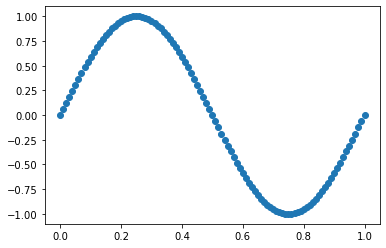

In [220]:
fig1 = plt.figure(1)
plt.scatter(t,y1,alpha=1)

Following the guidance of the literature, the measures of a variable from the nature will follow a Gaussian distribution, therefore we will include that behavior:
Mean of the value is 0, and a small variance, so the final values are normally distributed around the regression model.

In [221]:
e=np.random.normal(0,0.09,101)
y = np.sin(2*np.pi*t)+e

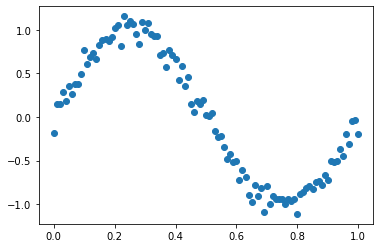

In [222]:
fig2 = plt.figure(2)
plt.scatter(t,y,alpha=1)

Comparing the function's outputs for the noiseless and the noisy case:


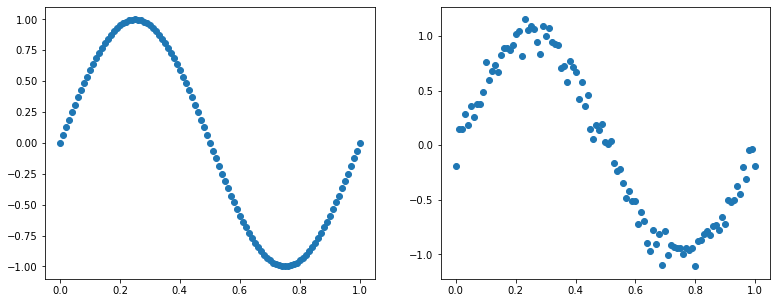

In [223]:
fig3 = plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.scatter(t,y1,alpha=1)
plt.subplot(1,2,2)
plt.scatter(t,y,alpha=1)

**The model:**

$y(x,w)=w_0+\sum_{m=0}^{M-1}w_m*x^m$

The goal is to learn the mapping between the input, in this case, the time span **x=t** and the out of the function which is the **Target=t**
To do so we will procced with the computation of the weights of the model in order to obtain the most accurate mapping between the input and the output.
To find the most accurate fit, we use the **hyperparamter** which in this case is the number of weights M, which will condtion how good the model fits the training data.

The way of computing the optimal value of the weights is motivated by the probabilities quantify the uncertainty behind the choice of the model parameters in light of the data provided by the data set. Therefore, if we take a Bayesian approach we have that:

$p(\textbf{w}|D)=\frac{p(D|\textbf{w})p({\textbf{w}})}{p(D)}$

The meaning of the bayesian interpretation is as follows:
The posterior probability, which is the probability of the weight's values, that can be seen as the product of the likelihood of the trainig data given the weights times the probability of the weights values normalized over the evidence of the training set values.

***Frequentist Approach:***

The likelihood p(D|w) is found by minimizing the negative log of the maximum likelihood (**ERROR FUNCTION**)

***Bayesian Approach***

The bayesian interpretation makes use of the prior knowledge which arises naturally

A **distribution function** is a function which maps value which takes a random variable with the probability of that event happening.
The most used one for continuous variables is the **Normal/Gaussian Distribution** which is defined by the mean and the variance.

$\N(x|\mu, \beta^{-1})$

Which can be computed as the expectation of the function (mean): 

$E(\N)=\int_{-\inf}^{\inf} \N(x|\mu, \beta^{-1}) x dx = \mu$

And the variance of the function:

$var(\N)=E(\N^2)-E(\N)^2= \sigma^2$


To find the parameters that describe the Normal Distribution, we maximize the likelihood of the distribution. In fact we maximize the *log likelihood*, since it is a monotonically increasing function

$\mu_{ML}=\frac{1}{N}\sum_{n=1}^{N}x_n$

$\beta_{ML}=\frac{1}{N}\sum_{n=1}^{N}(x_n)-\mu_{ML}$

**The issue with this approach is that the variance is computed based on the estimated mean $\mu_{ML}$ and therefore, since this parameter is an avergae of the obvservations. Leading to Overfitting**

**Probabilitsic interpretation of the curve fitting:**
We will try to find the probabilities of the target values **t** based on the probabilities distribution (Assuming that it follows a Gaussian distribution, where the mean is given by the predicted value y(x,**w**)), we use the Maximum Likelihood Framework to obtain $\textbf{w}$ and $\beta$.
- Maximizing the log likelikelihood, which is the same as minimzing the error function (in regressiom, the loss function $L^2$)) (**Sum-Of-Squares**): $E(w)=\frac{1}{2}\sum_{n=1}^{N}(t_n-y(x_n,w))^2$.
- After finding the value of the weights by minimizing sum-of-squares, the mean parameter is obatined and we can compute the precision $\beta_{ML}$.
The gradient of the sum-of-squares error function is given by: 
$\frac{1}{\beta_{ML}}=\frac{1}{N}\sum_{n=1}^{N}(y(x,\textbf{w})-t_n)^2$


Having found out both parameters, we can now compute probabilities of the **likelihood probability / predictive distribution** of p(t|x,$\textbf{w}_{ML}$,$\beta_{ML}$)
Continuing with the bayesian approach, we have that the desired probability, p(w|x,t) is proportional to the product of the likelihood function and the prior probability.
- The **Prior Probability** is computed assuming that the weights are i.i.d and drawn from a Normal Distribution, with **mean=0** and has a variance $\alpha$:

$p(w|\alpha)=\N(w|0,\alpha^-1)=(\frac{\alpha}{2*\pi})^{(M+1)/2}*e^{-\frac{\alpha}{2}w^Tw}$

**COMPUTING THE POSTERIOR PROBABILITY -> PREDICTIVE DISTRIBUTION**

1) Batch Methods. **MOORE PENROSE PSEUDO INVERSE (Φ)**

**Generalization of inverse of non-square matrixes**. This is a batch method, which computes the optimal weights based on the DESIGN MATRIX Φ which is a linear combination of the non linear functions of the input variable. Note that a dummy function has been introduced in order to account for the bias term $w_0$
Given that this first apprroach is the polynomial regression curve, the basis function is the input to the power of the weight index.

In [224]:
x_test = y.copy()
D_M = np.stack((np.ones([L]).T, x_test.T, (x_test**2).T, (x_test**3).T), axis=-1) # Design Matrix

In [225]:
np.shape(D_M)

(101, 4)

Pseudo Inverse method:

$W = (\Phi^T\Phi)^{-1}\Phi^{T}t$

In [226]:
np.shape(D_M)

(101, 4)

In [227]:
W_ml = (np.matmul(D_M.T, D_M))
W_ml = np.matmul(np.linalg.inv(W_ml),D_M.T)
W_ml = np.matmul(W_ml,t)
W_ml

array([ 0.49694591, -0.60177552, -0.00469979,  0.36348828])

In [228]:
W_ml.reshape([4])

array([ 0.49694591, -0.60177552, -0.00469979,  0.36348828])

Once we have found the optimal weights, we can compute precision, i.e. the inverse of the variance $\beta_{ML}^{-1}$ required to make predictions in the prediction probability.

$\frac{1}{\beta_{ML}}=\frac{1}{N}\sum_{n=1}^{N}(y(x,\textbf{w})-t_n)^2$

In [229]:
pred=np.sum(np.matmul(W_ml,D_M.T))

In [230]:
B_ml=1/((1/L)*np.sum((pred-y)**2))

**2. Sequential methods. Sequential Gradient Desncent** 

Another method is the sequential one, in which the weights are randomly initialized and are iteratively updated for each of the observations in the dataset. 

This is the algorithm:
    $w^{\tau_{n+1}}= w^{t_n}-n*\nabla{E_w}=w^{\tau_n}-n*(w^{(\tau)T}*\phi_{n})*\phi_{n}$

One should notice the dependece of the Loss Function on how this affects the weight update. It is common to use the Least Mean Squares LMS.

In [231]:
it = 3000   # Iterations of the weight optimization algo.
L = 100     # Number of samples in the pattern dataset
sigma = 0.09  # Noise Variance Indicator
M = 3       # Order of the polynomial
n = 0.1     # Learning rate

In [232]:
W = np.random.rand(4)    # Random initialization of the weights
W 
bias = np.ones(101)
t.T
tn2 = (t.T**2)
tn3 = (t.T**3)
X = np.stack([bias, t.T, tn2, tn3],axis=-1)


In [233]:
Error = np.zeros(it)
for i in range(0,it):
    Error_av=0
    for j in range(0,L):
        # To update the weight values, we need to compute the gradient of the error respect the weights. Direction in which higher changes
        y_hat = np.sum(np.matmul(W.T,X[j])) # Gradient of the error function wrt to the weignts
        grad = -((y[j]-y_hat)*X[j])
        W=W-n*grad
        Error_int = 0.5*(y[j]-y_hat)**2
    Error_av = (np.sum(Error_int))/L
    Error[i] = Error_av


Text(0.5, 1.0, 'Error vs iterations in weight update')

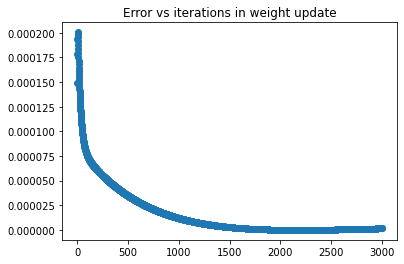

In [234]:
plt.scatter(range(0,it),Error,alpha=1)
plt.title("Error vs iterations in weight update")

Cross Validation in order to use the entire dataset as training set and as test set. For every fold one of the sets will be excluded from the training set and used for evaluation. The rest will be used for training the model. Then, the weights of the model will averaged in order to obtain the optimal model parameters

In [235]:
L = 1000
it = 2000
M = 3
var = 0.09
bias = np.ones((L,1))
tn = np.linspace(0.01,1,L)[np.newaxis]
xn = np.stack((bias, tn.T, (tn**2).T, (tn**3).T),axis=-1)
yn = np.sin(2*np.pi*tn)+np.random.normal(0,var,L)
yn = np.reshape(yn, 1000)

In [236]:
#CROSS VALIDATION
folds = 10 #No. of folds
batch_size = L/folds
batches_X = np.zeros((int(batch_size),M+1,folds))
batches_Y = np.zeros((int(batch_size),folds))
for i in range(0,folds):
    batches_X[:,:,i] = xn[int(batch_size)*i:int(batch_size)*(i+1)].reshape(100,4)
    batches_Y[:,i] = yn[int(batch_size)*i:int(batch_size)*(i+1)]

In [ ]:
X_train = np.zeros((900,4))
Y_train = np.zeros(900)
iterations = 2500
n = 0.09 #LEARNING RATE
count = 0 #Counter for keeping track of the number of folds stored in the training set
Error_erms_te = np.zeros((1,folds))
Error_erms_tr = np.zeros((1,folds))
for i in range(0,folds):
    print("Iteration %i" %(i+1))
    W = np.ones((M+1)) 
    for j in range(0,folds):
        if j == i:
            X_test = batches_X[:,:,j]
            Y_test = batches_Y[:,j]
            #print("Stored the test set")
        else:
            #print("Count is %i" %count)
            low_lim = 100*count
            upp_lim = 100*(count+1)
            X_train[low_lim:upp_lim] = batches_X[:,:,j]
            Y_train[low_lim:upp_lim] = batches_Y[:,j]
            count += 1
            #Once the bactches are completed we have to train the model with the given data in order to find the optimal weights. Moore-Penrose-Pseudo-Inverse (MPPI) Method
    print("Finished storing the batches")
    count = 0
    #
    #   TRAINING 
    #
    #Training the model based in the Gradient Descent Technique
    for it in range(0,iterations):
        for k in range(0,len(Y_train)):
            y_hat = np.matmul(W.T,X_train[k])
            grad = -(Y_train[i]-y_hat)*X_train[k]
            W = W-n*grad
    print("For iteration %i, the optimal weights are [%.4f, %.4f, %.4f, %.4f]" %(i, W[0], W[1], W[2], W[3]))
    #
    #   EVALUATING
    #   
    #       1. TEST SET
    #
    erms_te = 0
    for k in range(0,len(Y_test)):
        y_hat = np.matmul(W.T,X_test[k])
        partial_error = (Y_test[k]-y_hat)**2
        erms_te += partial_error
    Error_erms_te[:,i] = math.sqrt(erms_te/len(Y_test))
    print("It's generalization error is %.2f" %Error_erms_te[:,i])
    #   
    #       2. TRAIN SET
    #
    erms_tr = 0
    for k in range(0,len(Y_train)):
        y_hat = np.matmul(W.T,X_train[k])
        partial_error = (Y_train[k]-y_hat)**2
        erms_tr += partial_error
    Error_erms_tr[:,i] = math.sqrt(erms_tr/len(Y_train))
    print("It's train error is %.2f" %Error_erms_tr[:,i])